# Исследование объявлений о продаже квартир

Данные: архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

Цель: установить параметры, которые влияют на рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Открытие файла с данными и изучение общей информации. 

In [2]:
!pip install kaleido
import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')

In [2]:
#выведем первые 10 строк датафрейма на экран для проверки корректности отображения

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


На первый взгляд очень много NaN в таблице.

In [3]:
#посмотрим размер таблицы

data.shape

(23699, 22)

В датафрейме 23699 строк и 22 колонки.

In [4]:
#посмотрим общую информацию о датафрейме

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В данных есть аномальные значения, например, 19-комнатные квартиры.

In [5]:
#выведем информацию по типам данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Есть столбцы, у которых необходимо поменять тип данных. Например, дата публикации должна выводиться в формате datetime.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

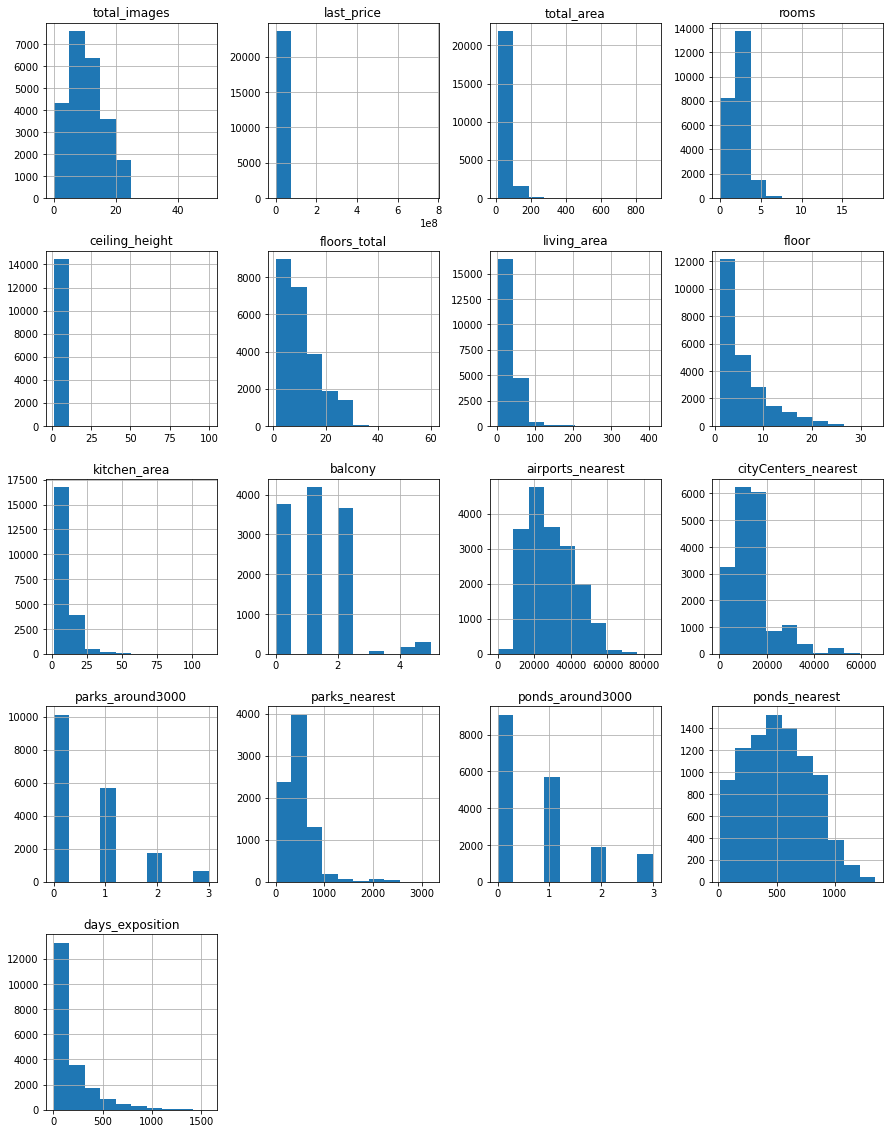

In [6]:
#построим гистрограммы для всех столбцов таблицы

data.hist(figsize=(15, 20))

Выводы по гистограммам датафрейма:

Не все графики достаточно информативны с указанной размерностью, поэтому в исследовании необходимо указать более детальную размерность, чтобы заметить особенности в данных. Тем не менее, можно заметить некоторые странные значения, например, жилая площадь `total_area` имеет значения свыше 200 кв.м., хотя в данных представлены только квартиры, а не загородные дома. 

### Предобработка данных

####  Работа с пропущенными значениями

In [7]:
#определим, в каких столбцах есть пропуски

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах есть пропущенные значения:
* `balcony` - вполне возможно, что пропуски связаны с тем, что продавец забыл указать балкон в виду его отсутствия в квартире.
* `is_apartment` - возможно, что тип квартир "аппартаменты" появился несколько позже, а значит столбец не был добавлен с самого начала сбора датасета, отсюда очень много пропусков.
* `ceiling_height` - столбец участвует в дальнейших расчетах, поэтому необходимо заполнить пропуски. Возможно, что продавцы забыли или не посчитали нужным указать данную информацию в объявлениях. 
* `cityCenters_nearest`/ `airports_nearest` - возможно, случился сбой с выгрузкой координатов по населенным пунктам, поэтому не подгрузилась информация по удаленности от центра города и аэропортов соответственно. Скорее всего, часть пропусков можно вычислить по названию населенного пункта `locality_name` и по вычислению его координатов, а затем расчета удаленности, но вручную это займет очень много времени.
* `locality_name` - пропуски в этом столбце могут быть связаны с тем, что продавец не указал населенный пункт в виду невнимательности или очевидности того факта, что объявление выставлено в базе Санкт-Петербурга. 
* `days_exposition` - пропуски могли появиться из-за того, что продавец забыл закрыть объявление или случился сбой при выгрузке данных. Средним значением или медианой заполнять не совсем корректно.
* `floors_total` - для пропусков в количестве этажей не представляется логической замены. Возможно, продавцы не посчитали нужным указывать количество этажей в доме, поэтому часть данных не заполнена. В данном случае мы не можем предположить, какая этажность была у домов с квартирами.
* `living_area`/ `kitchen_area` - пропуски могли появиться из-за того, что данная информация была необязательной к заполнению в объявлении, поэтому продавцы не стали тратить время на ее заполнение. Можем предположить, что между общей площадью `total_area`, где нет пропусков, и площадью жилой и кухни существует корреляция, тогда пропуски можно будет заполнить медианным значением, предварительно поделив квартиры на категории по общей площади.
* `parks_around3000`/`parks_nearest`, `ponds_around3000`/`ponds_nearest` - пропуски также могут быть связаны с тем, что эти данные не обязательны к заполнению в объявлении, т.к. это уже дополнительные подробности. Оставим их без заполнения, так как данная информация может и не понадобится в исследовании.

- **balcony**

Заполним пропуски в столбце с числом балконов

In [8]:
#выведем перечень уникальных значений столбца balcony

data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [9]:
#вычислим количество пропущенных значений

data['balcony'].isna().sum()

11519

Пропущено 50,7% значений. Заменим эти пропуски на 0.

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

- **is_apartment**

Посмотрим пропуски в столбце с типо квартир (апартаменты/нет). Если есть значения только с "True", то очевидно, что остальные значения продавцы забыли указать, как "False". 

In [11]:
#выведем перечень уникальных значений столбца is_apartment

data['is_apartment'].unique()

array([nan, False, True], dtype=object)

В данных присутствуют оба значения.

In [12]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [13]:
data['is_apartment'].isna().sum()

20924

Пропущено 88% значений. Если заменить все пропуски на False, то получится, что во всём датафрейме у нас всего 50 апартаментов, что, скорее всего, не соответствует действительности, поэтому заполнять эти пропуски мы пока не будем, если они не будут участвовать в расчетах в дальнейшем исследовании.

- **ceiling_height**

Посмотрим пропуски в столбце с высотой потолков.

In [14]:
data['ceiling_height'].isna().sum()

9195

В столбце `ceiling_height` пропущено 38,8% значений. Заменим пропуски на медианные значения, предварительно разделив квартиры на группы по удаленности от центра. 

Для этого создадим новый столбец с категориями:
* Близко к центру (удаленность менее 10 км от центра)
* В городе (от 10 км до 20 км включительно)
* Окраина от 20 км до 40 км включительно)
* За городом (более 40 км)

In [15]:
#добавим столбец с категориями удаленности от центра города

def categorize_cityCenters(row):
    try:
        if row <= 10000:
            return 'близко к центру'
        elif 10000 < row <= 20000:
            return 'в городе'
        elif  20000 < row <= 40000:
            return 'окраина'
        elif row > 40000:
            return 'за городом'
    except:
        return 'нет категории'

In [16]:
#применим результаты функции к новому столбцу в данных

data['cityCenters_category'] = data['cityCenters_nearest'].apply(categorize_cityCenters)

In [17]:
#заменим пропуски в столбце ceiling_height

ceiling_median = data.pivot_table(index='cityCenters_category', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_median

,median,count
,ceiling_height,ceiling_height
cityCenters_category,,
близко к центру,3.00,3333
в городе,2.60,6618
за городом,2.55,207
окраина,2.60,1402


Заметим, что по мере удаления от центра потолки в квартире становятся ниже.

In [18]:
for t in data['cityCenters_category'].unique():
    data.loc[(data['cityCenters_category'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['cityCenters_category'] == t), 'ceiling_height'].median()

In [19]:
#проверим, сколько пропусков осталось после заполнения медианными значениями

data['ceiling_height'].isna().sum()

2575

Оставшиеся пропуски в `ceiling_height` можно заменить медианой высоты потолков, значение которой равняется 2,6, что является нормальным значением потолков в современных квартирах.

In [20]:
data['ceiling_height'].describe()

count    21124.000000
mean         2.750936
std          1.050074
min          1.000000
25%          2.600000
50%          2.600000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [21]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [22]:
data['ceiling_height'].isna().sum()

0

- **locality_name**

Пропуски составляют 0,2%. Можно заполнить недостающую информацию исходя из столбца с категоризацией удаленности от центра `cityCenters_category`. Например, если расстояние будет менее 10 км, то в пропуске точно можно будет поставить "Санкт Петербург". Кроме того, от 10 км до 20 км также может относиться к городу, поскольку протяженность города считается с севера на юг - 52 км, с востока на запад - 25 км.

In [23]:
data['locality_name'].isna().sum()

49

In [24]:
data.loc[(data['cityCenters_nearest'] <= 20000) & (data['locality_name'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_category
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,близко к центру
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.60,24.0,15.60,3,NaN,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,в городе
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.60,24.0,33.10,21,NaN,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,в городе
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,3.00,5.0,30.80,5,NaN,...,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,близко к центру
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,близко к центру
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,близко к центру
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,3.00,7.0,NaN,6,NaN,...,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,близко к центру
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,3.00,7.0,59.10,5,False,...,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,близко к центру
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.60,24.0,20.00,23,NaN,...,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,в городе
6765,20,4895892.0,60.70,2015-03-12T00:00:00,2,2.60,24.0,31.90,3,NaN,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,468.0,в городе


In [25]:
#производим замену на Санкт-Петербург

rows = (data['cityCenters_nearest'] <= 20000) & (data['locality_name'].isna())
data.loc[rows, "locality_name"] = "Санкт-Петербург"                                             

In [26]:
data['locality_name'].isna().sum()

12

Удалось сократить пропуски в столбце с названием населенного пункта `locality_name` с 49 до 12.

- **living_area/kitchen_area**

Столбцы с жилой площадью `living_area` и площадью кухни `kitchen_area` также содержат 8% и 9,6% пропущенных значений соответственно. Зная общую площадь квартир, мы можем заменить медианными значениями пропуски в жилой площади и площади кухни (поскольку, скорее всего, эти переменные находятся в линейной зависимости, то есть чем больше общая площадь, тем больше жилая площадь и кухня). 

In [27]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Значение медианы и среднего арифметического отличается, но не слишком значительно. Проверим на графике наличие экстремальных значений, которые могли бы сместить результаты среднего арифметического.

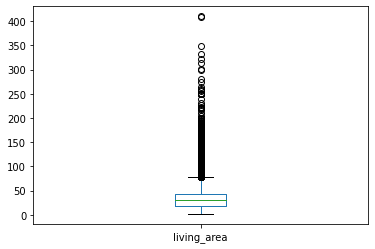

In [28]:
data['living_area'].plot(kind='box')
plt.show()

На графике видны слишком большие значения жилой площади, которые могут значительно сместить усредненный результат, поэтому лучше заполнять пропуски медианой. Проверим нашу гипотезу с положительной корреляцией между общей площадью квартиры и жилой площадью.

In [29]:
data['living_area'].corr(data['total_area'])

0.9395373338721493

Значение показывает наличие тесной линейной взаимосвязи между нашими переменными.

In [30]:
#добавим столбец с категориями квартир по площади

def categorize_totalarea(row):
    try:
        if row <= 50:
            return 'средняя площадь'
        elif 50 < row <= 150:
            return 'большая площадь'
        elif row > 150:
            return 'очень большая площадь'
    except:
        return 'нет категории'

In [31]:
data['category_totalarea'] = data['total_area'].apply(categorize_totalarea)

In [32]:
total_area_median = data.pivot_table(index='category_totalarea', values='living_area', aggfunc=['median', 'count'])
total_area_median

,median,count
,living_area,living_area
category_totalarea,,
большая площадь,41.0,10963
очень большая площадь,112.0,496
средняя площадь,18.4,10337


In [34]:
for t in data['category_totalarea'].unique():
    data.loc[(data['category_totalarea'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['category_totalarea'] == t), 'living_area'].median()

In [35]:
data['living_area'].isna().sum()

0

Таким же образом заменим пропущенные значения на медианы в площади кухни, поскольку площадь кухни скорее всего также находится в линейной зависимости от общей площади. Проверим корреляцию Пирсона.

In [36]:
data['kitchen_area'].corr(data['total_area'])

0.6091211711198318

Значение 0,6 свидетельствует о наличии положительной корреляции между величинами.

In [37]:
kitchen_area_median = data.pivot_table(index='category_totalarea', values='kitchen_area', aggfunc=['median', 'count'])
kitchen_area_median

,median,count
,kitchen_area,kitchen_area
category_totalarea,,
большая площадь,10.20,10970
очень большая площадь,21.21,496
средняя площадь,8.00,9955


In [38]:
for t in data['category_totalarea'].unique():
    data.loc[(data['category_totalarea'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['category_totalarea'] == t), 'kitchen_area'].median()

In [39]:
data['kitchen_area'].isna().sum()

0

- **floors_total**

Пропуски составляют 0,4% от общей выборки, поэтому можем удалить эти строки, так как это не сильно повлияет на результаты исследования.

In [40]:
data.dropna(subset=['floors_total'],inplace=True)

In [42]:
data['floors_total'].isna().sum()

0

In [41]:
data.dropna(subset=['floors_total']).reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_category,category_totalarea
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,в городе,большая площадь
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,в городе,средняя площадь
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в городе,большая площадь
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,3.00,14.0,112.0,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,близко к центру,очень большая площадь
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,близко к центру,большая площадь
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23608,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,близко к центру,большая площадь
23609,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.60,5.0,38.0,4,NaN,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,None,большая площадь
23610,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.60,3.0,29.7,1,NaN,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,большая площадь
23611,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,41.0,12,NaN,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,в городе,большая площадь


- **days_exposition**

Пропущено 13,4% значений. Пропуски в этом столбце могут зависеть от множества факторов, поэтому средним и медианой их заполнять не совсем корректно. Заменим их на маркер "0", что будет означать пропуск, чтобы в дальнейшем пропуски не помешали перевести данные к целочисленному типу.

In [43]:
data['days_exposition'].isna().sum()

3172

In [44]:
#минимальное значение размещения квартир 1 день, поэтому данное значение в качестве маркера для пропусков брать нельзя

data['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [45]:
data['days_exposition'].fillna(0, inplace=True)

-  **cityCenters_nearest/airports_nearest**

Пропуски в этих столбцах составляют 23% и 23,3% соответственно. Пропуски могут быть заполнены через название населенного пункта, вычисление его координат по яндекс картам и затем вычисление удаленности до центра и аэропорта. Однако если делать это вручную, то потратим слишком много времени. 

- **parks_around3000 / ponds_around3000**

Пропуски составляют 23% в обоих столбцах, оставим, как есть, поскольку логичной замены для недостающих значений у нас нет. Средняя и медиана тут не подойдет, высчитывать вручную ближайшие водоемы и парки будет трудозатратно.

- **parks_nearest / ponds_nearest**

Пропуски составляют 65% и 61% соответственно. Очевидно, что это была не обязательная для заполнения информация, поэтому многие продавцы не посчитали нужным ее заполнять. Аналогично столбцам выше оставим пропуски, как они есть. В будущем, если эта информация будет нужна для исследования, то лучше в объявлениях указать эту графу для заполнения обзательной.

In [46]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              11
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition             0
cityCenters_category     5509
category_totalarea          0
dtype: int64

Таким образом, мы сократили число пропусков:
* заменив значения на нулевые в столбце `balcony`, `days_exposition`
* заменив на медианные значения в столбцах `ceiling_height`, `living_area`, `kitchen_area`
* заменив на Санкт-Петербург по километражу в столбце `locality_name`
* удалив незначительное количество пропусков для датасета в столбце `floors_total`

Причины появления пропусков в данных:
1. Технологическая причина: сбой во время записи данных, сбой из-за смены формата, при котором часть данных потерялась. Например, столбец с дополнительной информацией по объявлению мог появиться позже изначального сбора данных, поэтому по ранее внесенным данным могли появиться пропуски. 
2. Человеческий фактор: продавцы не внесли данные в объявления, поскольку они были необязательными, продавцы не посчитали эти пункты нужной информацией или не стали вдаваться в подробности и узнавать эту информацию для добавления.

#### Преобразование типов данных

По формату:
* `first_day_exposition` - дата публикации, нужен тип datetime вместо object
* `floors_total` - нужен тип int, так как количество этажей - это целое значение
* `is_apartment` - нужен тип bool
* `balcony` - нужен тип int, так как количество балконов - целое значение
* `parks_around3000`  - нужен тип int, так как количество парков - целое значение
* `days_exposition` - нужен тип int
* `ponds_around3000` - нужен тип int, так как количество водоемов - целое значение

Далее необходимо преобразовать столбцы в корректный тип данных для избежания дальнейших ошибок при проведении расчетов.

Переводим столбец `balcony` в целочисленный тип, поскольку количество балконов - это целое значение (2,5 балконов быть не может). Также столбец `is_apartment` является булевым типом, т.к. отражает информацию о наличии или отсутствии данной характеристики. 

In [47]:
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')

In [48]:
import numpy as np

Переводим столбцы `floors_total, parks_around3000, ponds_around3000, days_exposition` в целочисленный тип, поскольку столбцы содержат информацию с целочисленными значениями. Так, количество этажей, количество парков и водоемов, количество дней - это целые значения. 

In [49]:
data['floors_total'] = np.int64(data['floors_total'])
data['parks_around3000'] = np.int64(data['parks_around3000'])
data['ponds_around3000'] = np.int64(data['ponds_around3000'])
data['days_exposition'] = np.int64(data['days_exposition'])

Переводим столбец `first_day_exposition` в тип datetime, поскольку в столбце указана дата публикации. Точное время в столбце не указано, поэтому переводим в тип год-месяц-день.

In [50]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

In [52]:
data['last_price'] = np.int64(data['last_price'])

#### Работа с явными и неявными дубликатами

Проверим датафрейм на наличие явных дублей, поскольку если есть полностью одинаковые объявления, то это будет говорить о сбое при выгрузке или наличии риелторов, которые выставили одинаковые объявления с владельцем квартиры.

In [53]:
data.duplicated().sum()

0

Одинаковых объявлений в данных нет.

Рассмотрим названия населенных пунктов в `locality_name` на неявные дубликаты.

In [54]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В списке обнаружены дубликаты с разным написанием, например, городской поселок Янино-1 и городской посёлок Янино-1. Заменим ё на е, чтобы устранить дубликаты.

In [55]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Также обнаружены дубликаты с разными формулировками, такие как "поселок городского типа Рябово" и "поселок Рябово". Заменим формулировки поселка городского типа на поселок. Есть также поселок Рахья и снт Рахья, что также является дубликатами (как и садовое товарищество Приладожский и поселок с таким же названием).  Есть коттеджный поселок Лесное и поселок Лесное, что также дубликаты. 

Обнаружены также такие названия как поселок Зимитицы и деревня Зимитицы, но, возможно, эти места обозначают разные поселения, уточнить нет возможности, поэтому оставим как есть.

In [56]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок станции')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'поселок Новая Ропша', 'Павловск', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'поселок Аннино', 'поселок Ефимовский',
       'поселок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'поселок Понтонный',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'поселок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосн

#### Работа с аномальными значениями

Проверим данные на аномальные значения.

In [57]:
#проверим, сколько пропусков удалено

data.shape

(23613, 24)

In [58]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,18081.000000,18104.000000,2.361300e+04,8045.000000,2.361300e+04,9061.000000,23613.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.734789,10.673824,34.361845,5.877313,10.446646,0.593063,28788.008185,14185.084015,-2.151456e+18,490.554630,-2.151456e+18,518.209469,156.586075
std,5.681541,1.090172e+07,35.648988,1.078380,0.994259,6.597173,21.808086,4.873539,5.676967,0.960307,12626.209956,8614.132292,3.900713e+18,341.336698,3.900713e+18,277.887489,213.502550
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,-9.223372e+18,1.000000,-9.223372e+18,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.300000,0.000000,18575.000000,9233.750000,0.000000e+00,288.000000,0.000000e+00,294.000000,22.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13093.000000,0.000000e+00,455.000000,0.000000e+00,503.000000,73.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.770000,16.000000,41.500000,8.000000,11.500000,1.000000,37242.000000,16287.000000,1.000000e+00,612.000000,1.000000e+00,730.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000e+00,3190.000000,3.000000e+00,1344.000000,1580.000000


In [59]:
data['ceiling_height'].unique()

array([  2.7 ,   2.6 ,   3.  ,   3.03,   2.5 ,   2.67,   2.55,   2.56,
         3.05,   2.75,   2.9 ,   2.8 ,   2.65,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Есть аномальные значение, такие как 100, 25, 32 и т.д. Логично предположить, что это значения 2.5, 3.2. 

In [60]:
def calculate_height(height):
    if height >= 10:
        height = height*0.1
    return height

In [61]:
data['ceiling_height'] = data['ceiling_height'].apply(calculate_height)

In [62]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.6 ,  3.  ,  3.03,  2.5 ,  2.67,  2.55,  2.56,  3.05,
        2.75,  2.9 ,  2.8 ,  2.65,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  2.4 ,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Высота потолка в квартире по нормам в жилых помещениях должна составлять не менее 2,5 м., а в коридорах, прихожих и холлах - не менее 2,1 м. Поэтому ниже этого значения помещения считаются нежилыми. Посмотрим, сколько у нас в датасете строк с потолками ниже 2,1 м.

In [63]:
data[data['ceiling_height'] < 2.1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_category,category_totalarea
552,11,2999000,33.50,2017-03-30,1,2.00,15,17.5,6,True,...,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,270,в городе,средняя площадь
2572,4,2400000,62.00,2018-12-27,3,2.00,5,40.0,4,True,...,Луга,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,0,None,большая площадь
4212,1,2120000,35.43,2017-12-18,1,2.00,18,16.6,9,True,...,Тосно,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,36,None,средняя площадь
5712,5,1500000,42.80,2017-08-14,2,1.20,2,27.5,1,True,...,поселок Мга,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,248,None,средняя площадь
5850,9,1650000,35.50,2018-05-29,1,2.00,5,18.4,5,True,...,Луга,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,100,None,средняя площадь
11352,4,3300000,36.00,2017-06-18,1,2.00,17,15.2,12,True,...,поселок Металлострой,25268.0,26980.0,0,NaN,0,NaN,53,окраина,средняя площадь
15061,19,5600000,56.40,2018-05-11,2,1.40,14,32.4,5,True,...,Санкт-Петербург,14814.0,13610.0,0,NaN,0,NaN,315,в городе,большая площадь
16446,6,12300000,88.30,2019-03-12,3,2.00,5,63.9,2,True,...,Санкт-Петербург,38415.0,7675.0,1,568.0,1,154.0,0,близко к центру,большая площадь
16884,0,1500000,33.00,2018-10-03,1,2.00,5,20.0,5,False,...,Выборг,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,6,None,средняя площадь
16934,5,4100000,40.00,2017-10-17,1,1.75,37,17.4,5,True,...,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71,окраина,средняя площадь


Поскольку квартир с аномально низким потолком всего 15, а всего строк в датафрейме было 23699, то данные строки можно отфильтровать, т.к. они составляют незначительную долю от всех данных. При этом потолок не может быть выше 3,5 метров в квартире. Отфильтруем эти значения.

In [64]:
data = data.loc[(data['ceiling_height'] >= 2.1) & (data['ceiling_height'] < 3.5)]

In [65]:
data['ceiling_height'].unique()

array([2.7 , 2.6 , 3.  , 3.03, 2.5 , 2.67, 2.55, 2.56, 3.05, 2.75, 2.9 ,
       2.8 , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 3.3 ,
       2.71, 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06, 2.72, 2.54, 2.51,
       2.78, 2.76, 2.58, 2.52, 2.87, 2.66, 2.59, 2.45, 2.92, 3.11, 3.13,
       3.15, 3.16, 3.12, 2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 2.94, 2.83,
       2.4 , 3.38, 3.01, 3.18, 3.35, 2.3 , 2.48, 2.62, 2.82, 2.63, 2.88,
       3.24, 3.36, 3.08, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97,
       3.14, 2.68, 3.22, 3.27, 2.93, 3.46, 2.4 , 3.47, 3.33, 3.32, 2.98,
       2.86, 3.17, 3.28, 3.04, 3.23, 3.02, 3.21, 3.43, 3.39, 2.69, 3.31,
       2.2 , 3.42, 2.99, 3.49, 2.91, 3.29, 2.25, 2.26, 2.89, 2.49, 3.48])

In [66]:
data['airports_nearest'].unique()  #аномальных значений нет

array([18863., 12817., 21741., ..., 28323., 11751., 20151.])

Аномальных значений в расстоянии до ближайшего аэропорта нет.

In [67]:
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

Количество балконов в пределах нормальных значений, т.к. раньше строили хрущевки с четырьмя и пятью балконами.

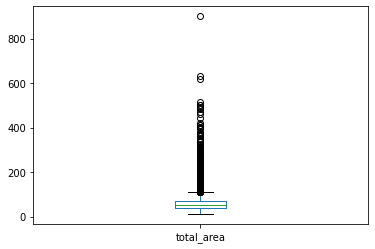

In [68]:
data['total_area'].plot(kind='box')
plt.show()

Квартиры с площадью более 200 м2, скорее всего, являются аномальными значениями, поскольку с такой площадью могут продаваться хостелы, гостиницы, бизнес-центры, а это уже мало похоже на продажу среднестатистических квартир и будет сильно искажать результаты исследования. Отфильтруем строки с площадью квартир свыше 200 м2, чтобы посмотреть сколько это строк удалится.

In [69]:
data[data['total_area'] >= 200]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_category,category_totalarea
492,18,95000000,216.0,2017-12-05,4,3.00,5,86.0,4,True,...,Санкт-Петербург,21740.0,436.0,2,138.0,3,620.0,14,близко к центру,очень большая площадь
509,5,90000000,225.0,2016-06-26,6,3.00,4,134.0,2,True,...,Санкт-Петербург,32864.0,5720.0,0,NaN,2,519.0,416,близко к центру,очень большая площадь
521,20,25717300,230.1,2015-01-21,3,2.60,3,130.0,1,True,...,Пушкин,16877.0,29030.0,2,676.0,3,278.0,1441,окраина,очень большая площадь
581,20,65000000,365.0,2019-03-18,7,2.90,7,112.0,7,True,...,Санкт-Петербург,19827.0,1690.0,3,378.0,3,58.0,0,близко к центру,очень большая площадь
660,3,49950000,483.9,2017-10-04,7,3.20,6,312.5,4,True,...,Санкт-Петербург,23079.0,945.0,3,461.0,3,22.0,391,близко к центру,очень большая площадь
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000,297.5,2018-09-09,6,3.14,4,181.8,2,True,...,Санкт-Петербург,20630.0,1229.0,3,189.0,3,40.0,42,близко к центру,очень большая площадь
23281,20,24800000,231.2,2015-01-21,6,3.10,5,99.8,4,True,...,Санкт-Петербург,21480.0,2453.0,3,75.0,1,795.0,0,близко к центру,очень большая площадь
23327,19,34400000,215.0,2019-03-15,5,2.75,4,82.4,4,True,...,Санкт-Петербург,37268.0,15419.0,0,NaN,0,NaN,0,в городе,очень большая площадь
23400,17,30000000,213.0,2017-09-28,7,3.40,5,151.4,5,True,...,Санкт-Петербург,21146.0,1225.0,2,342.0,3,30.0,299,близко к центру,очень большая площадь


In [70]:
#уберем квартиры с площадью выше 200 кв.м. из датасета

data = data.loc[data['total_area'] < 200]

In [71]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8])

Тоже самое касается комнат. Конечно, есть квартиры с 10-ю и больше комнат, но это скорее квартиры на несколько этажей, что также сильно отличается от среднестатистических квартир и будет искажать результаты. Отфильтруем строки, убрав квартиры с 7 и больше комнатами.

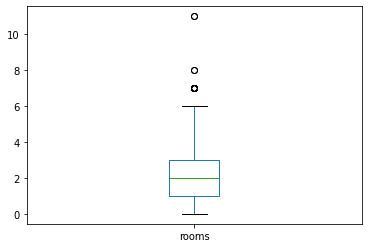

In [72]:
 data['rooms'].plot(kind='box')
plt.show()

In [73]:
data = data.loc[data['rooms'] < 7]

In [74]:
data['last_price'].max()

289238400

Цены также содержат аномальные значения, поскольку 330 млн. руб., возможно, продавали гостиницу, бизнес-центр и т.д.

По данным сайтов со статистикой объявлений квартир говорится, что в 2014 г. цена за кв.м. была около 50 000 руб., минимальная площадь для проживания одного человека составляет примерно 18 кв.м. Поэтому нормальная стоимость квартир начинается хотя бы от 900 000 руб.

In [75]:
data[data['last_price'] < 800000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_category,category_totalarea
247,7,650000,31.0,2017-01-20,1,2.6,3,18.4,1,True,...,Сланцы,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,378,None,средняя площадь
268,7,650000,46.0,2018-03-15,2,2.5,5,30.0,5,True,...,Сланцы,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,75,None,средняя площадь
606,5,790000,38.6,2018-04-03,2,3.0,2,24.0,1,True,...,поселок Синявино,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,374,None,средняя площадь
1312,5,750000,26.0,2018-02-03,1,2.5,2,18.0,1,True,...,поселок Вырица,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,167,None,средняя площадь
1358,10,550000,27.6,2019-03-06,1,2.5,5,17.0,2,True,...,Сланцы,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,22,None,средняя площадь
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,9,560000,28.5,2018-08-11,1,2.6,4,17.2,4,True,...,Пикалево,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,198,None,средняя площадь
23067,8,600000,31.8,2019-04-24,1,2.6,2,20.0,1,True,...,деревня Коркино,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,0,None,средняя площадь
23153,9,650000,41.0,2017-10-13,2,2.6,3,28.0,1,True,...,Бокситогорск,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,14,None,средняя площадь
23484,11,470000,44.5,2018-07-02,2,2.6,2,28.0,2,True,...,Сланцы,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,298,None,средняя площадь


In [76]:
data = data.loc[(data['last_price'] < 100000000) & (data['last_price'] > 900000)]

Проверим аномальные значения в количестве дней размещения объявлений. Заметим, что есть объявления, котоые висели на сайте более 2 лет и выше. Есть даже объявления, которые находились на сайте 4 года. Эти объявления, скорее всего, либо забыли убрать, либо не закрыли администраторы сайта, поскольку обычно за размещение объявлений взимается плата, и никто бы не стал так долго их размещать.

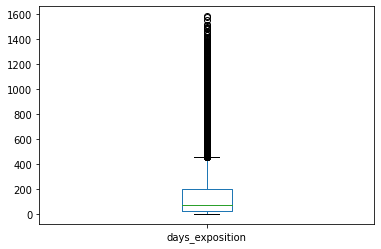

In [77]:
data['days_exposition'].plot(kind='box')
plt.show()

In [78]:
data[data['days_exposition'] > 1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_category,category_totalarea
109,2,7497600,62.5,2015-12-08,2,2.60,5,35.5,5,True,...,Пушкин,14517.0,26670.0,1,517.0,0,NaN,1048,окраина,большая площадь
353,4,5990000,43.5,2015-05-08,1,3.00,5,25.0,4,True,...,Санкт-Петербург,10527.0,10278.0,1,93.0,0,NaN,1292,в городе,средняя площадь
398,7,12789000,79.3,2014-12-09,2,3.00,8,43.1,5,False,...,Санкт-Петербург,39393.0,11096.0,1,537.0,0,NaN,1345,в городе,большая площадь
437,12,3350000,37.0,2015-02-24,1,2.55,6,17.8,6,True,...,Петергоф,46151.0,34044.0,1,185.0,1,755.0,1273,окраина,средняя площадь
459,13,5200000,51.0,2016-03-02,2,2.55,9,32.0,5,True,...,Санкт-Петербург,48522.0,16360.0,0,NaN,0,NaN,1153,в городе,большая площадь
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23248,5,4900000,80.0,2014-12-25,3,2.60,15,47.0,14,True,...,поселок Мурино,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,1187,None,большая площадь
23318,6,5620020,82.3,2015-03-10,3,2.70,21,45.6,12,True,...,Санкт-Петербург,21793.0,17121.0,0,NaN,1,31.0,1200,в городе,большая площадь
23389,6,2850000,40.0,2015-01-26,1,2.60,10,19.0,8,False,...,поселок Бугры,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,1012,None,средняя площадь
23426,17,8778000,47.5,2014-12-29,1,3.00,7,18.4,4,True,...,Санкт-Петербург,39412.0,10186.0,1,1424.0,3,204.0,1360,в городе,средняя площадь


In [79]:
data = data.loc[data['days_exposition'] < 1000]

Проверим отфильтрованные данные на аномальные значения.

In [80]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22555.000000,2.255500e+04,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,17273.000000,17293.000000,2.255500e+04,7508.000000,2.255500e+04,8497.000000,22555.000000
mean,9.866371,5.875344e+06,57.451194,2.015207,2.686291,10.856528,32.696574,5.955442,10.181997,0.605808,28906.118682,14459.064303,-2.151370e+18,492.830714,-2.151370e+18,525.074144,143.902239
std,5.651276,5.117893e+06,25.479522,0.968553,0.188875,6.613735,16.562649,4.908447,4.955996,0.967372,12760.178760,8498.880702,3.900663e+18,341.208590,3.900663e+18,277.242362,182.434614
min,0.000000,9.100000e+05,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,-9.223372e+18,1.000000,-9.223372e+18,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.200000,0.000000,18410.000000,9781.000000,0.000000e+00,288.750000,0.000000e+00,303.000000,22.000000
50%,9.000000,4.600000e+06,51.100000,2.000000,2.600000,9.000000,30.000000,4.000000,9.000000,0.000000,27102.000000,13255.000000,0.000000e+00,456.000000,0.000000e+00,510.000000,71.000000
75%,14.000000,6.550000e+06,68.000000,3.000000,2.750000,16.000000,41.000000,8.000000,11.200000,1.000000,37434.000000,16408.000000,1.000000e+00,614.000000,1.000000e+00,735.000000,190.000000
max,50.000000,9.800000e+07,199.200000,6.000000,3.490000,60.000000,159.600000,33.000000,93.000000,5.000000,84853.000000,65952.000000,3.000000e+00,3190.000000,3.000000e+00,1344.000000,999.000000


Проверим, сколько данных было удалено из-за пропусков и аномальных значений.

In [81]:
data.shape

(22555, 24)

In [82]:
before_after = pd.DataFrame({'Количество строк': [23699, 22555], '%': [100, 95]})
before_after

,Количество строк,%
0,23699,100
1,22555,95


При обработке пропусков и аномальных значений было удалено 1144 строки, что составляет 5% данных. Если удалять можно не более 10%, то мы уложились в этот диапазон.

**Вывод**

Были убраны из датасета аномальные значения:
- квартиры с потолком ниже 2,1 м. и выше 3,5 м.
- квартиры с 7-ю и более комнатами
- квартиры с ценой ниже 900 тыс.руб. и свыше 100 млн. руб.
- квартиры с длительностью размещения свыше 3 лет.

### Посчитайте и добавьте в таблицу новые столбцы

In [83]:
#посчитаем цену квадратного метра

data['price_square_meter'] = data['last_price'] / data['total_area']
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_category,category_totalarea,price_square_meter
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,18863.0,16028.0,1,482.0,2,755.0,0,в городе,большая площадь,120370.370370
1,7,3350000,40.40,2018-12-04,1,2.60,11,18.6,1,True,...,12817.0,18603.0,0,NaN,0,NaN,81,в городе,средняя площадь,82920.792079
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.3,4,True,...,21741.0,13933.0,1,90.0,2,574.0,558,в городе,большая площадь,92785.714286
3,0,64900000,159.00,2015-07-24,3,3.00,14,112.0,9,True,...,28098.0,6800.0,2,84.0,3,234.0,424,близко к центру,очень большая площадь,408176.100629
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,31856.0,8098.0,2,112.0,1,48.0,121,близко к центру,большая площадь,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,True,...,45602.0,34104.0,1,352.0,1,675.0,239,окраина,большая площадь,73717.948718
23695,14,3100000,59.00,2018-01-15,3,2.60,5,38.0,4,True,...,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,45,None,большая площадь,52542.372881
23696,18,2500000,56.70,2018-02-11,2,2.60,3,29.7,1,True,...,NaN,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,0,None,большая площадь,44091.710758
23697,13,11475000,76.75,2017-03-28,2,3.00,17,41.0,12,True,...,39140.0,10364.0,2,173.0,3,196.0,602,в городе,большая площадь,149511.400651


In [84]:
#создаем столбец с днями недели

data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_category,category_totalarea,price_square_meter,weekday_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,16028.0,1,482.0,2,755.0,0,в городе,большая площадь,120370.370370,3
1,7,3350000,40.40,2018-12-04,1,2.60,11,18.6,1,True,...,18603.0,0,NaN,0,NaN,81,в городе,средняя площадь,82920.792079,1
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.3,4,True,...,13933.0,1,90.0,2,574.0,558,в городе,большая площадь,92785.714286,3
3,0,64900000,159.00,2015-07-24,3,3.00,14,112.0,9,True,...,6800.0,2,84.0,3,234.0,424,близко к центру,очень большая площадь,408176.100629,4
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,8098.0,2,112.0,1,48.0,121,близко к центру,большая площадь,100000.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,True,...,34104.0,1,352.0,1,675.0,239,окраина,большая площадь,73717.948718,4
23695,14,3100000,59.00,2018-01-15,3,2.60,5,38.0,4,True,...,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,45,None,большая площадь,52542.372881,0
23696,18,2500000,56.70,2018-02-11,2,2.60,3,29.7,1,True,...,NaN,-9223372036854775808,NaN,-9223372036854775808,NaN,0,None,большая площадь,44091.710758,6
23697,13,11475000,76.75,2017-03-28,2,3.00,17,41.0,12,True,...,10364.0,2,173.0,3,196.0,602,в городе,большая площадь,149511.400651,1


In [85]:
#создаем столбец с месяцами, в которые были опубликованы объявления

data['month_exposition'] = data['first_day_exposition'].dt.month
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_category,category_totalarea,price_square_meter,weekday_exposition,month_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,1,482.0,2,755.0,0,в городе,большая площадь,120370.370370,3,3
1,7,3350000,40.40,2018-12-04,1,2.60,11,18.6,1,True,...,0,NaN,0,NaN,81,в городе,средняя площадь,82920.792079,1,12
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.3,4,True,...,1,90.0,2,574.0,558,в городе,большая площадь,92785.714286,3,8
3,0,64900000,159.00,2015-07-24,3,3.00,14,112.0,9,True,...,2,84.0,3,234.0,424,близко к центру,очень большая площадь,408176.100629,4,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,2,112.0,1,48.0,121,близко к центру,большая площадь,100000.000000,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,True,...,1,352.0,1,675.0,239,окраина,большая площадь,73717.948718,4,8
23695,14,3100000,59.00,2018-01-15,3,2.60,5,38.0,4,True,...,-9223372036854775808,NaN,-9223372036854775808,NaN,45,None,большая площадь,52542.372881,0,1
23696,18,2500000,56.70,2018-02-11,2,2.60,3,29.7,1,True,...,-9223372036854775808,NaN,-9223372036854775808,NaN,0,None,большая площадь,44091.710758,6,2
23697,13,11475000,76.75,2017-03-28,2,3.00,17,41.0,12,True,...,2,173.0,3,196.0,602,в городе,большая площадь,149511.400651,1,3


In [86]:
#создаем столбец  с годами размещения публикации

data['year_exposition'] = data['first_day_exposition'].dt.year
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_category,category_totalarea,price_square_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2,755.0,0,в городе,большая площадь,120370.370370,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.60,11,18.6,1,True,...,NaN,0,NaN,81,в городе,средняя площадь,82920.792079,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.3,4,True,...,90.0,2,574.0,558,в городе,большая площадь,92785.714286,3,8,2015
3,0,64900000,159.00,2015-07-24,3,3.00,14,112.0,9,True,...,84.0,3,234.0,424,близко к центру,очень большая площадь,408176.100629,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1,48.0,121,близко к центру,большая площадь,100000.000000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,True,...,352.0,1,675.0,239,окраина,большая площадь,73717.948718,4,8,2016
23695,14,3100000,59.00,2018-01-15,3,2.60,5,38.0,4,True,...,NaN,-9223372036854775808,NaN,45,None,большая площадь,52542.372881,0,1,2018
23696,18,2500000,56.70,2018-02-11,2,2.60,3,29.7,1,True,...,NaN,-9223372036854775808,NaN,0,None,большая площадь,44091.710758,6,2,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17,41.0,12,True,...,173.0,3,196.0,602,в городе,большая площадь,149511.400651,1,3,2017


In [87]:
#рассчитаем расстояние до центра города в км

data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

#меняем формат на целочисленные значения, для этого пропуски заменим на 0

data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0)
data['cityCenters_nearest_km'] = np.int64(data['cityCenters_nearest_km'])
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cityCenters_category,category_totalarea,price_square_meter,weekday_exposition,month_exposition,year_exposition,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,2,755.0,0,в городе,большая площадь,120370.370370,3,3,2019,16
1,7,3350000,40.40,2018-12-04,1,2.60,11,18.6,1,True,...,0,NaN,81,в городе,средняя площадь,82920.792079,1,12,2018,18
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.3,4,True,...,2,574.0,558,в городе,большая площадь,92785.714286,3,8,2015,13
3,0,64900000,159.00,2015-07-24,3,3.00,14,112.0,9,True,...,3,234.0,424,близко к центру,очень большая площадь,408176.100629,4,7,2015,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,1,48.0,121,близко к центру,большая площадь,100000.000000,1,6,2018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,True,...,1,675.0,239,окраина,большая площадь,73717.948718,4,8,2016,34
23695,14,3100000,59.00,2018-01-15,3,2.60,5,38.0,4,True,...,-9223372036854775808,NaN,45,None,большая площадь,52542.372881,0,1,2018,0
23696,18,2500000,56.70,2018-02-11,2,2.60,3,29.7,1,True,...,-9223372036854775808,NaN,0,None,большая площадь,44091.710758,6,2,2018,0
23697,13,11475000,76.75,2017-03-28,2,3.00,17,41.0,12,True,...,3,196.0,602,в городе,большая площадь,149511.400651,1,3,2017,10


In [88]:
#создаем функцию для определения категорий этажа

def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [89]:
#применим функцию к новому столбцу

data['floor_type'] = data.apply(floor_category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,cityCenters_category,category_totalarea,price_square_meter,weekday_exposition,month_exposition,year_exposition,cityCenters_nearest_km,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,755.0,0,в городе,большая площадь,120370.370370,3,3,2019,16,другой
1,7,3350000,40.4,2018-12-04,1,2.60,11,18.6,1,True,...,NaN,81,в городе,средняя площадь,82920.792079,1,12,2018,18,первый
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,True,...,574.0,558,в городе,большая площадь,92785.714286,3,8,2015,13,другой
3,0,64900000,159.0,2015-07-24,3,3.00,14,112.0,9,True,...,234.0,424,близко к центру,очень большая площадь,408176.100629,4,7,2015,6,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121,близко к центру,большая площадь,100000.000000,1,6,2018,8,другой


In [90]:
data['floor_type'].value_counts()

другой       16719
последний     3085
первый        2751
Name: floor_type, dtype: int64

Новые столбцы добавлены в наш датасет.

### Проведите исследовательский анализ данных

#### Изучение общих параметров

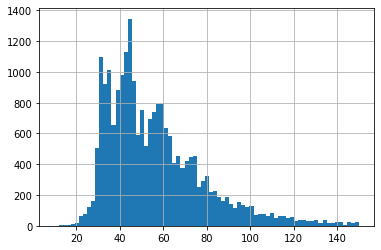

In [139]:
#Рассмотрим общую площадь квартир

data['total_area'].hist(bins=75, range=(10,150))
plt.show()

Большая часть квартир имеет площадь менее 100 кв.м. Больше всего распространены квартиры площадью примерно 40-45 кв.м. 

In [92]:
data['total_area'].describe()

count    22555.000000
mean        57.451194
std         25.479522
min         12.000000
25%         40.000000
50%         51.100000
75%         68.000000
max        199.200000
Name: total_area, dtype: float64

Средняя площадь квартир в данных составляет 57 кв.м., а медианное значение -  51 кв.м.

<AxesSubplot:>

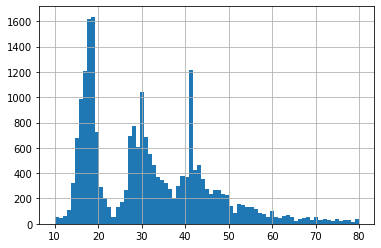

In [93]:
data['living_area'].hist(bins=75, range = (10,80))

Большинство квартир имеют жилую площадь от 15 до 50 кв.м. На графике наблюдаются три пика, вероятно, для однокомнатных квартир распространена площадь около 17-18 кв.м., тогда как для двухкомнатных ~ 29-30 кв.м., для трехкомнатных ~ 42-43 кв.м. Квартиры площадью более 80 кв.м. встречаются крайне редко.

<AxesSubplot:>

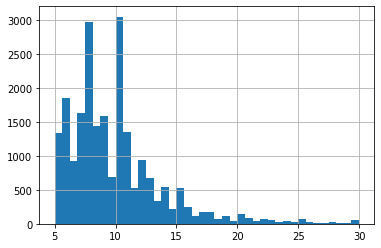

In [94]:
data['kitchen_area'].hist(bins=40, range=(5,30))

Как видно из графика, квартиры с площадью кухни более 20 кв.м. встречаются крайне редко, а кухни площадью более 30 кв.м. - единичные случаи. Самые распространенные варианты квартир имеют кухни от 5 до 15 кв.м., при этом на гистограмме также видны два пика, вероятно, для квартир однокомнатных и двухкомнатных.

<AxesSubplot:>

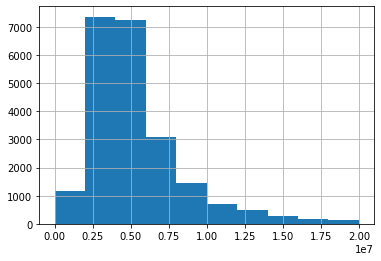

In [95]:
data['last_price'].hist(range=(0,20000000))

Большинство квартир имеют стоимость от 2 млн.руб. до 5-6 млн.руб. Свыше этой суммы уже намного меньше квартир выставлено на продажу.

<AxesSubplot:>

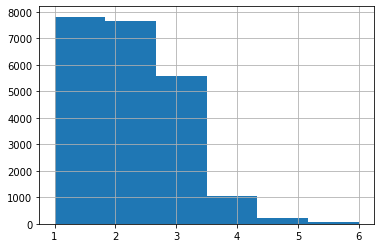

In [140]:
data['rooms'].hist(bins=6, range = (1,6))

Более всего распространены квартиры с 1-2 комнатами, менее всего распространены квартиры с 5-6 комнатами.

<AxesSubplot:>

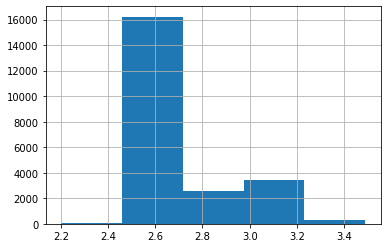

In [97]:
data['ceiling_height'].hist(bins=5)

Наиболее распространенные варианты квартир имеют потолки 2,5 м. до 3,2 м. Свыше этого значения потолки кажутся подозрительно высокими, таких квартир встречается единицы.

<AxesSubplot:>

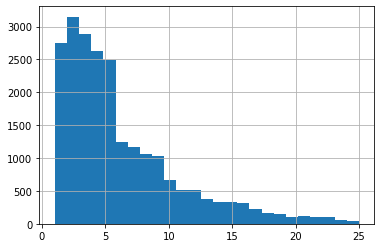

In [98]:
data['floor'].hist(bins=25, range = (1,25))

Наиболее распространенные варианты квартир находятся с 1-15 этаж, меньше всего квартир находится с 20 по 25 этаж.

<AxesSubplot:>

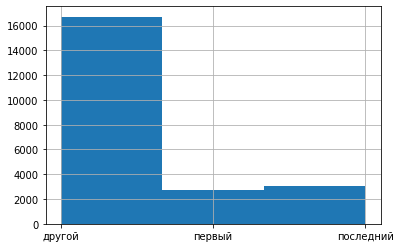

In [99]:
data['floor_type'].hist(bins=3)

Меньше квартир находится на первом этаже, чем на последнем. Большинство квартир находится на другом этаже.

<AxesSubplot:>

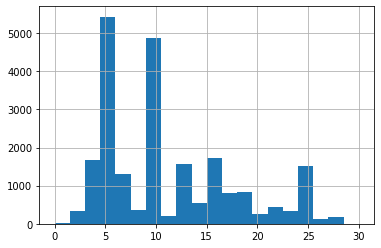

In [100]:
data['floors_total'].hist(bins=20, range = (0,30))

Большинство квартир находятся в домах, этажность которых находится в пределах 5-25 этажей.

<AxesSubplot:>

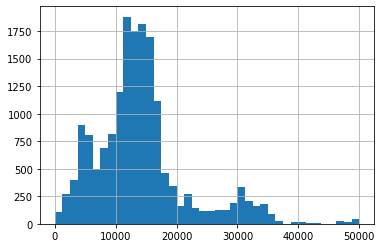

In [101]:
data['cityCenters_nearest'].hist(bins=40, range=(0, 50000))

Большинство квартир находятся в удаленности от центра до 20 км., дальше этого расстояния уже значительно меньше квартир. После 40 км. квартиры уже редко выставляются.

<AxesSubplot:>

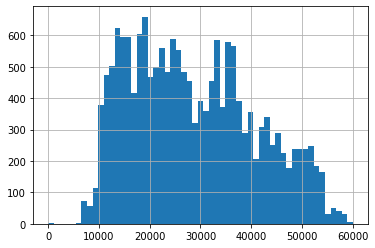

In [102]:
data['airports_nearest'].hist(bins=55, range =(0, 60000))

Большинство квартир находятся в 10-55 км. от аэропрота, то есть самое большое расстояние до аэропорта - это час езды на машине. Дальше, чем за 60 км. от аэропорта встречаются единичные случаи продажи квартир.

<AxesSubplot:>

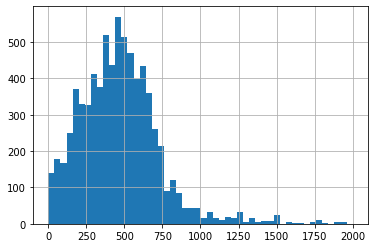

In [103]:
data['parks_nearest'].hist(bins=50, range=(0, 2000))

Большинство квартир находятся от 250-750 м. около парка, квартиры с удаленностью от парка свыше 1 км. встречаются реже.

<AxesSubplot:>

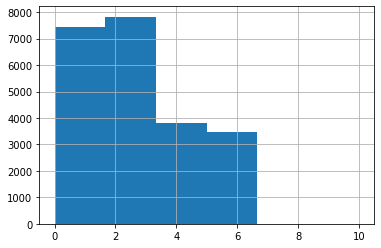

In [104]:
data['weekday_exposition'].hist(bins=6, range=(0,10))

Большинство квартир были размещены в будни в первой половине недели, до пятницы. Меньше квартир было размещено в выходные.

<AxesSubplot:>

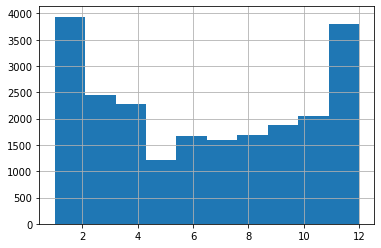

In [105]:
data['month_exposition'].hist()

Можно заметить, что на продажи квартир влияет сезонный спрос, поскольку большинство квартир были размещены в начале года и в конце. 

Летом у многих людей отпуска, отдых и дачные заботы, поэтому в этот период мало кто занимается квартирным вопросом. При этом к осени люди начинают интересоваться переездом, продажей своей квартиры, поэтому спрос превышает предложение и можно продать квартиру по более выгодной цене. Поэтому осенью количество размещенных объявлений увеличивается вплоть до зимы. В с января по апрель также наблюдается большое количество объявлений, что тоже можно объяснить психологией людей, что в новом году хочется начать с изменения своей жизни, куда входит продажа квартиры, приобретение новой квартиры.

**Выводы**

Среднестатистическая квартира, выставленная на продажу:
* имеет площадь 40-45 кв.м.; 
* с 1-2 комнатами;
* с потолком от 2,5 м до 3 м.; 
* стоимостью от 2 млн. руб.;
* расположена до 20 км от центра города.

#### Продолжительность продажи квартир

In [106]:
data['days_exposition'].describe()

count    22555.000000
mean       143.902239
std        182.434614
min          0.000000
25%         22.000000
50%         71.000000
75%        190.000000
max        999.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартир - 143 дня, то есть примерно 5 месяцев. Медианное значение - 71 день, то есть чуть более 2 месяцев. Мы заполнили пропуски нулем, поэтому стоит исключить эти значения из гистограммы.

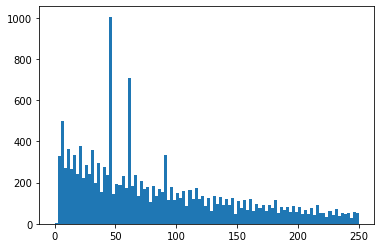

In [107]:
plt.hist(data.query('days_exposition != 0')['days_exposition'], bins=100, range=(0,250))
plt.show()

Большинство квартир продаются в срок до 150 дней. При этом заметим особенность, что есть несколько пиков по продаже квартир. Можно предположить, что платформа по размещению объявлений взимает деньги за размещение в какой-то период, поэтому продавцы закрывают в это время объявления. Возможно, что на почту продавцам приходит расслыка, которая предлагает либо закрыть объявление, либо оплатить следующий период размещения, поэтому возникают такие всплески продаж.

Быстрой продажей можно назвать срок в 45 дней, длительная продажа - более 200 дней (полгода) и дольше.

#### Факторы, влияющие на общую (полную) стоимость объекта

**total_area**

Изучим зависимость стоимости квартиры от ее общей площади.

In [108]:
pivot_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['median', 'count'])
pivot_total_area

,median,count
,last_price,last_price
total_area,,
12.0,2400000.0,1
13.0,1850000.0,3
13.2,1686000.0,1
14.0,1190000.0,1
15.0,1725000.0,2
...,...,...
197.9,32238780.0,1
198.0,30489500.0,2


In [109]:
#переименуем названия столбцов в таблице для удобства

pivot_total_area.columns = ['median', 'count']

<AxesSubplot:xlabel='total_area'>

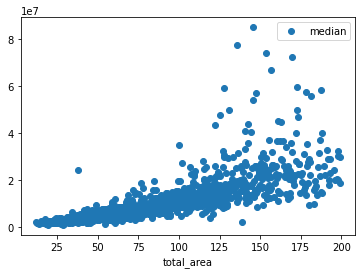

In [110]:
#построим график

pivot_total_area.plot(y = 'median', style = 'o')

Исходя из графика, чем больше площадь квартиры, тем выше ее цена. Есть несколько выбросов с завышением цены квартир, но они не значительно влияют на общий тренд.

In [111]:
data['total_area'].corr(data['last_price'])

0.7308043379936154

Показатель корреляции близок к 1, что говорит о сильной положительной взаимосвязи между площадью квартиры и ее стоимостью.

**living_area**

Изучим влияние жилой площади на стоимость квартиры.

In [112]:
pivot_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['median', 'count'])
pivot_total_area

,median,count
total_area,,
12.0,2400000.0,1
13.0,1850000.0,3
13.2,1686000.0,1
14.0,1190000.0,1
15.0,1725000.0,2
...,...,...
197.9,32238780.0,1
198.0,30489500.0,2
198.1,20000000.0,1


In [113]:
#переименуем названия столбцов в таблице для удобства

pivot_living_area.columns = ['median', 'count']

<AxesSubplot:xlabel='living_area'>

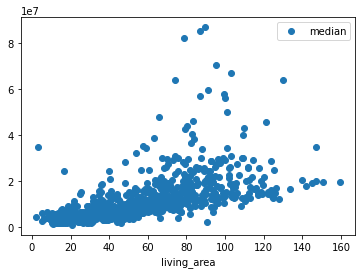

In [114]:
#построим график

pivot_living_area.plot(y = 'median', style = 'o')

На графике также видна зависимость цены квартиры от жилой площади: чем больше жилая площадь, тем выше стоимость квартиры.

In [115]:
data['living_area'].corr(data['last_price'])

0.6097743316306545

Показатель корреляции также указывает на сильную взаимосвязь, однако данная связь уже немного ниже, чем в случае с общей площадью.

**kitchen_area**

Изучим влияние площади кухни на стоимость квартиры.

In [116]:
pivot_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['median', 'count'])
pivot_kitchen_area

,median,count
,last_price,last_price
kitchen_area,,
1.30,4250000.0,1
2.00,2720000.0,7
2.30,2940000.0,1
2.40,2200000.0,1
2.89,5967734.0,1
...,...,...
63.00,40000000.0,1
64.00,10495000.0,2


In [117]:
#переименуем названия столбцов в таблице для удобства

pivot_kitchen_area.columns = ['median', 'count']

<AxesSubplot:xlabel='kitchen_area'>

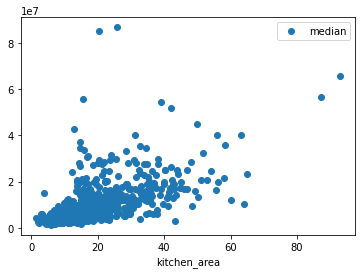

In [118]:
#построим график

pivot_kitchen_area.plot(y = 'median', style = 'o')

На графике не наблюдается сильная линейная взаимосвязь, возможно, что площадь кухни уже меньше влияет на стоимость квартиры, чем жилая и общая площади квартиры.

In [119]:
data['kitchen_area'].corr(data['last_price'])

0.5487797756376946

Наши предположения подтвердились, корреляция действительно ниже. Это значит, что площадь кухни влияет на общую стоимость, но меньше, чем два других параметра.

**rooms**

Изучим влияние количества комнат в квартире на ее общую стоимость.

In [120]:
pivot_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median', 'count'])
pivot_rooms

,median,count
,last_price,last_price
rooms,,
0,2700000,191
1,3600000,7815
2,4750000,7657
3,6110165,5568
4,8500000,1050
5,12475000,224
6,13675500,50


In [121]:
#переименуем названия столбцов в таблице для удобства

pivot_rooms.columns = ['median', 'count']

<AxesSubplot:xlabel='rooms'>

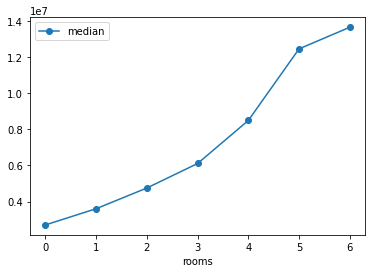

In [122]:
#построим график

pivot_rooms.plot(y = 'median', style = 'o-')

На графике видна линейная взаимосвязь, говорящая о том, что с увеличением числа комнат, стоимость квартиры также растет.

In [123]:
data['rooms'].corr(data['last_price'])

0.42700497212541016

Показатель корреляции свидетельствует о наличии положительной взаимосвязи, однако эта связь слабее, а значит меньше оказывает влияние на конечную стоимость квартиры.

**floor_type**

Изучим влияние типов этажей, на которых расположены квартиры на их конечную стоимость.

In [124]:
pivot_floor_type = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['median', 'count'])
pivot_rooms

,median,count
rooms,,
0,2700000,191
1,3600000,7815
2,4750000,7657
3,6110165,5568
4,8500000,1050
5,12475000,224
6,13675500,50


In [125]:
#переименуем названия столбцов в таблице для удобства

pivot_floor_type.columns = ['median', 'count']

<AxesSubplot:xlabel='floor_type'>

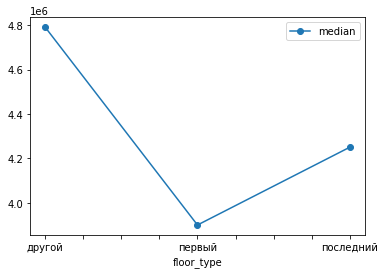

In [126]:
#построим график
pivot_floor_type.plot(y = 'median', style = 'o-')

Из графика видно, что квартиры на первом этаже дешевле квартир на остальных этажах. Это может быть связано с тем, что на первом этаже квартиры легче обокрасть, влезая через окно. Также слышимость людей на улице выше, чем в других квартирах.

Дороже квартиры на последнем этаже, однако самые дорогие квартиры продаются не на первом и не на последнем этаже. Таким образом, этаж квартиры является одним из факторов, формирующих стоимость квартиры.

**weekday_exposition, month_exposition, year_exposition**

Изучим влияние дня, месяца и года размещения объявления на стоимость квартиры.

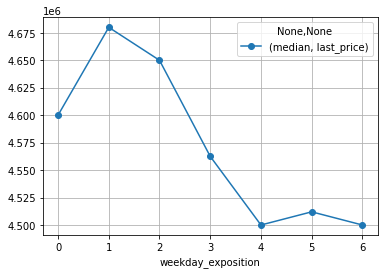

In [127]:
# Построим график на основе сводной таблицы по дням размещения объявлений, где 0 - это понедельник
(
    data.pivot_table(index='weekday_exposition', values='last_price', aggfunc = ['median'])
    .plot(grid= True, style='o-')
)
plt.show()

Исходя из графика, дороже всего продавались квартиры, выставленные во вторник-среду, дешевле всего - выставленные в пятницу-воскресенье. Возможно, что в будние дни люди больше мониторят объявления, находясь на работе или вечером дома,тем самым у будничных объявлений популярность и просмотров больше, что повышает вероятность продажи квартиры по более выгодной цене. Выставленная квартира в воскресенье имеет мало просмотров, ее обгоняют свежие объявления, выставленные в будни, тем самым квартира теряется в общей массе объявлений, поэтому ее продают по сниженной цене.

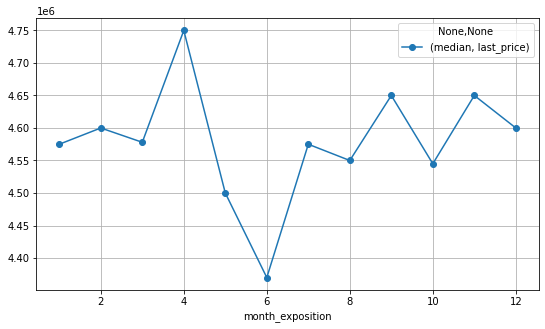

In [128]:
# Построим график на основе сводной таблицы по месяцам размещения объявлений
(
    data.pivot_table(index='month_exposition', values='last_price', aggfunc = ['median'])
    .plot(grid= True, style='o-', figsize=(9,5))
)
plt.show()

Дешевле всего продаются квартиры, размещенные в летние месяцы, так как в эти месяцы люди отдыхают и менее заинтересованы в покупках квартир, из-за чего спрос меньше и цена на квартиры падает. Самые выгодные месяцы для продажи квартиры - с февраля-апреля, а также с октября по ноябрь. Возможно, что люди предпочитают покупать квартиры в более теплые месяцы, а не зимой. Кроме того, зимой также много праздничных дней, поэтому люди также стараются отдыхать, избегая серьезных сделок.

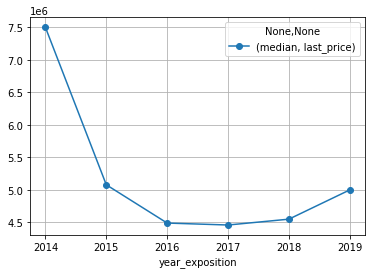

In [129]:
# Построим график на основе сводной таблицы по годам размещения объявлений
(
    data.pivot_table(index='year_exposition', values='last_price', aggfunc = ['median'])
    .plot(grid= True, style='o-')
)
plt.show()

Известно, что в 2014-2015 гг. был кризис в стране, с чем скорее всего связано резкое падение цен на жилье. Однако к 2019 г. цены снова стали расти.

In [130]:
#создадим таблицу с найденными корреляциями

corr_last_price = pd.DataFrame({'factor': ['total_area', 'living_area', 'kitchen_area', 'rooms', 'weekday', 'month', 'year'], 'correlation': [0.73, 0.61, 0.55, 0.43, -0.01, 0, 0]})
corr_last_price

,factor,correlation
0,total_area,0.73
1,living_area,0.61
2,kitchen_area,0.55
3,rooms,0.43
4,weekday,-0.01
5,month,0.00
6,year,0.00


**Вывод**

Самыми значимыми факторами, оказывающие сильное влияние на общую цену квартиры, являются общая площадь, жилая площадь и площадь кухни. Это вполне логично, поскольку цена квартиры рассчитывается от установившейся цены за квадратный метр на рынке недвижимости, а затем умножается на количество квадратных метров квартиры. Поэтому это самый важный фактор, влияющий на цену квартиры. 

Меньше всего на цену квартиры влияет дата размещения объявления (месяц, день, год). 

#### Сравнение средней стоимости квадратного метра в 10 населенных пунктах

In [131]:
#найдем 10 самых крупных населенных пунктов по числу объявлений

top_10 = data['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург      14939
поселок Мурино         547
поселок Шушары         434
Всеволожск             390
Пушкин                 350
Колпино                335
поселок Парголово      325
Гатчина                305
деревня Кудрово        294
Выборг                 224
Name: locality_name, dtype: int64

In [132]:
#создадим сводную таблицу, где посчитаем среднее значение (для этого возьмем внешнюю переменную)

mean_price = data.query('locality_name in @top_10.index').pivot_table(index='locality_name', values='price_square_meter', aggfunc=['mean'])
mean_price.columns = ['price_square_meter']
mean_price

,price_square_meter
locality_name,
Всеволожск,68654.390515
Выборг,58276.651211
Гатчина,68989.471043
Колпино,75279.711602
Пушкин,102652.332671
Санкт-Петербург,112430.805236
деревня Кудрово,92421.528671
поселок Мурино,85737.763211
поселок Парголово,90259.743484


In [133]:
#отсортируем таблицу по убыванию

mean_price = mean_price.astype(int)
mean_price['price_square_meter'].sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      112430
Пушкин               102652
деревня Кудрово       92421
поселок Парголово     90259
поселок Мурино        85737
поселок Шушары        78465
Колпино               75279
Гатчина               68989
Всеволожск            68654
Выборг                58276
Name: price_square_meter, dtype: int64

**Вывод**

Наибольшая стоимость квадратного метра наблюдается в Санкт-Петербурге. Кроме того, высокая стоимость за квадратный метр в Пушкине, возможно, потому что там красивая местность с дворцами, парками, и при этом не так далеко от города.

Наименьшая стоимость квадртаного метра наблюдается в Гатчине, Всеволожске и Выборге, поскольку эти города расположены дальше всего от Санкт-Петербурга, что сказывается на стоимость.

#### Зависимость цены квартиры от удаленности от центра

Для начала создадим свобдную таблицу, в которой отфильтруем только квартиры в Санкт-Петербурге. Также необходимо убрать ноль из столбца `cityCenters_nearest_km`, поскольку эти значения обозначают пропуски и могут повлиять на результаты. По умолчанию сводная таблица как раз считает среднее арифметическое, поэтому строки будут обозначать километры удаленности от центра, а значения - цена квартир.

In [134]:
pivot_price_per_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != 0')\
.pivot_table(index='cityCenters_nearest_km', values='last_price')
pivot_price_per_km

,last_price
cityCenters_nearest_km,
1,1.144347e+07
2,1.181356e+07
3,1.011644e+07
4,1.144936e+07
5,1.166058e+07
6,1.237915e+07
7,1.028505e+07
8,8.214702e+06
9,6.351572e+06


<AxesSubplot:xlabel='cityCenters_nearest_km'>

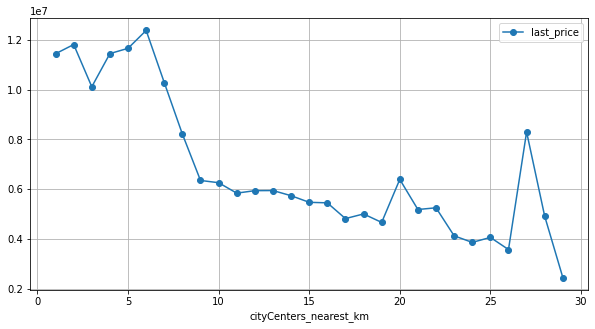

In [135]:
#для наглядности построим график на основе таблицы

pivot_price_per_km.plot(grid=True, style='o-', figsize=(10, 5))

Судя по графику, с увеличением расстояния до центра города стоимость квартир уменьшается. Самые дорогие квартиры расположены в районе 7 км. от центра. Далее идет резкое снижение цены в связи с удаленностью от центра Санкт-Петербурга. 

Неожиданный рост цен на квартиры наблюдается в значении ~ 27-28 км, возможно, там располагается Пушкин, где как мы уже заметили, стоимость квартир тоже дорогая. Возможно, это связано с тем, что там очень живописная местность и из-за этого хороший спрос на квартиры.

### Общий вывод

<b>Цель проекта</b>: провести анализ рынка недвижимости Санкт-Петербурга и соседних населенных пунктов

**Задачи:**
* обзор полученных данных;
* подготовка данных к анализу (исправление дубликатов и аномальных значений, заполнение пропусков);
* изучить длительность продажи квартир;
* выявить факторы,  которые больше всего влияют на стоимость квартир;
* выявить 10 населенных пунктов с самой высокой стоимостью квадратного метра;
* оценить влияние удаленности от центра на конечную стоимость квартиры;
* составить выводы и рекомендации по полученным результатам.

**Наиболее распространенный вариант квартиры**
Среднестатистическая квартира, выставленная на продажу:
* имеет площадь 40-50 кв.м.; 
* с 1-2 комнатами;
* с потолком от 2,5 м до 3 м.; 
* стоимостью от 2-5 млн. руб.;
* расположена до 20 км от центра города.

**Длительность продажи квартир**
- Большинство квартир продаются за срок до 150 дней
- Наиболее распространенный срок продажи - 71 день, то есть чуть больше 2 месяцев.

Рекомендация:
Необходимо детальнее рассмотреть несколько пиков по продажам квартир (45 дней, 60 дней). Возможно, что эти закрытые объявления по продаже квартир связаны с правилами размещения объявлений на платформе. Если это так, то данные несколько искажают реальные сроки продажи квартир, поскольку владелец мог указать, что квартира продана, чтобы не платить за дальнейшее размещение на платформе.

**Факторы, влияющие на стоимость квартир**
- Самыми значимыми факторами являются общая площадь, жилая площадь и площадь кухни. Увеличение площадей напрямую влияет на увеличение стоимости квартиры.
- Стоимость квартиры зависит от типа этажа, поскольку на первом этаже квартиры дешевле, чем на остальных этажах из-за повышенной опасности грабежа и слышимости улицы.
- Продажа квартир связана с сезонностью, поскольку летом спроса на квартиры нет, из-за чего цена на квартиры падает. Тогда как осенью и весной идет повышение спроса на квартиры, поэтому в это время квартиры продаются по более высокой цене.

**Населенные пункты с самой высокой и низкой стоимостью квадратного метра**
- Самая дорогая цена за квадратный метр в Санкт-Петербурге (112430 руб.) и в г. Пушкин (102652 руб.)
- Самая низкая цена за квадратный метр в д. Кудрово (68654 руб.) и Выборге (58276 руб.)

**Влияние удаленности от центра на конечную стоимость квартиры**
- Самые дорогие квартиры находятся в районе 7 км. от центра Санкт-Петербурга
- Самые дешевые квартиры находятся за 20-25 км. от центра города

Рекомендации:
- В датасете нигде не указано все ли квартиры являются вторичными или же есть первичное жилье (например, объявление выставил маркетолог застройщика). Интересно было бы сравнить, как меняются продажи в зависимости от данного типа жилья. Возможно, что эти рынки надо сравнивать по отдельности, поскольку на эти типы жилья влияют и другие факторы.
- Также интересно было бы сравнить влияние других факторов на стоимость квартиры, например, зависит ли цена от наличия капитального ремонта в квартире, типа квартиры (студия или нет, т.к. у нас было много пропусков, сложно сделать выводы).
- Необходимо скорректировать данные и убрать поведение продавцов, связанное с правилами платформы, на которой были размещены объявления. Возможно, что платформа имела определенные условия, например, закрытие объявлений в определенный период (напоминание или взятие платы за размещение в определенный период). Из-за этого может быть искажение в данных, что приведет к неверным выводам.